In [184]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib tk
%matplotlib inline

In [185]:
# util functions 
def plot_images(img_set, n_r, n_c, img_titles):
    fig = plt.figure(figsize = (20, 8))
    cnt = 0
    for i in range(n_r):
        for j in range(n_c):
            if cnt == len(img_set):
                break
            ax1 = fig.add_subplot(n_r, n_c, cnt + 1)
            ax1.imshow(img_set[cnt], cmap = 'gray', aspect='auto')
            ax1.set_title(img_titles[cnt], fontsize = 15)
            cnt = cnt + 1
    plt.show() 

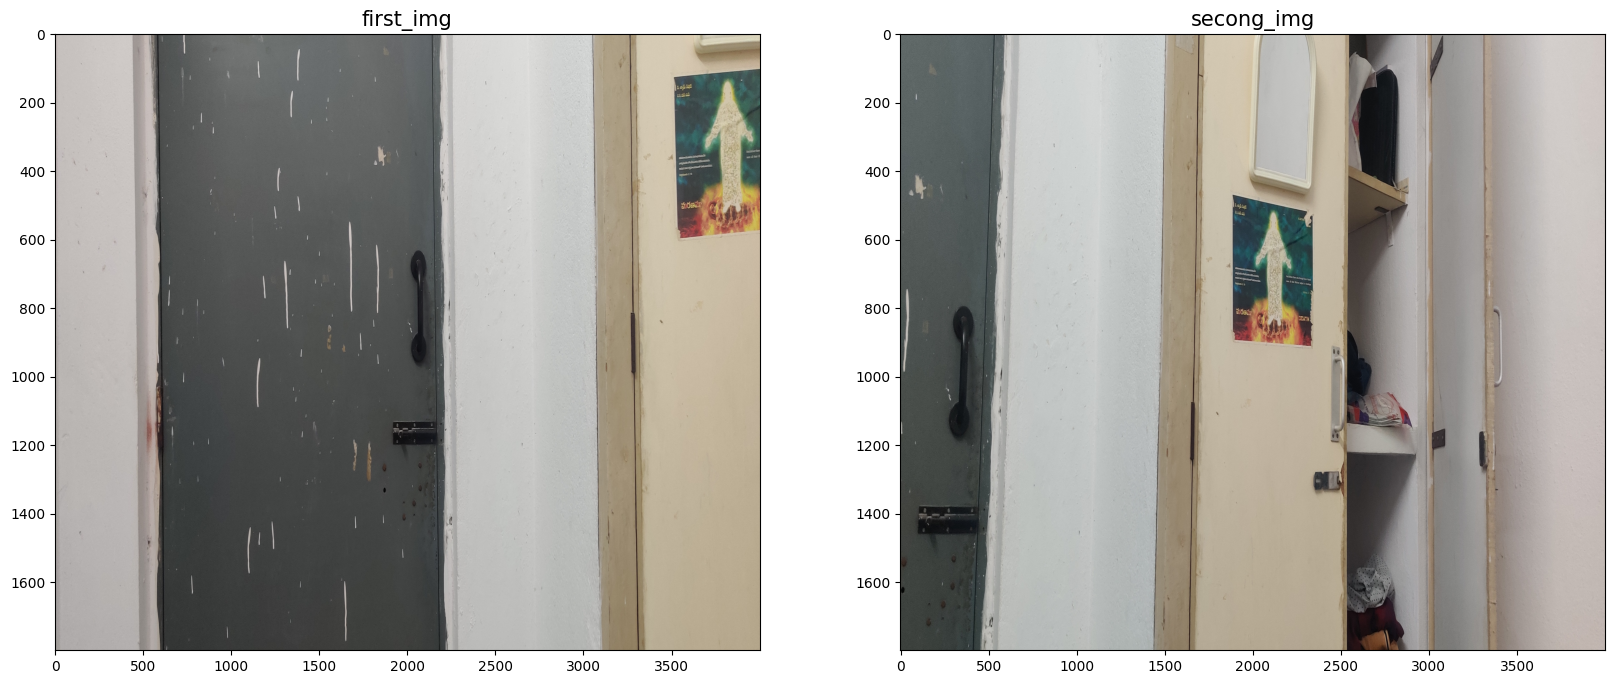

In [186]:
#read images
img1 = cv2.imread('img_1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('img_2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img_set = []
img_set.append(img1)
img_set.append(img2)

img_titles = []
img_titles.append('first_img')
img_titles.append('secong_img')

plot_images(img_set, 1, 2, img_titles)

In [187]:
# get keypoints and desciptors
def get_kps_and_descriptors(img, feature_extractor_method = 'sift'):
    if(feature_extractor_method == 'sift'):
        feature_extractor_obj = cv2.SIFT_create()
    elif(feature_extractor_method == 'surf'):
        feature_extractor_obj = cv2.SURF_create()
    elif(feature_extractor_method == 'brief'):
        feature_extractor_obj = cv2.BRIEF_create()
    elif(feature_extractor_method == 'orb'):
        feature_extractor_obj = cv2.ORB_create()
        
    kps, descriptors = feature_extractor_obj.detectAndCompute(img, None)
    
    return (kps, descriptors)

feature_extractor_method = 'sift'
(kps1, descriptors1) = get_kps_and_descriptors(img1, feature_extractor_method)
(kps2, descriptors2) = get_kps_and_descriptors(img2, feature_extractor_method)



In [188]:
#check kps
# print('kps in first image: {}'.format(kps1))
for kp in kps1:
    (x, y) = kp.pt
    direction = kp.angle
#     kp.size = 10
    print(x, y)


43.99209976196289 358.68389892578125
43.99209976196289 358.68389892578125
52.45108413696289 334.14178466796875
109.3194351196289 374.164794921875
114.48474884033203 861.8673706054688
132.12368774414062 246.873779296875
132.66748046875 605.504638671875
132.66748046875 605.504638671875
138.8056182861328 1453.9576416015625
142.16903686523438 1455.4852294921875
142.16903686523438 1455.4852294921875
144.95094299316406 910.0794067382812
144.95094299316406 910.0794067382812
145.9385528564453 1461.9625244140625
161.82171630859375 695.7200927734375
161.82171630859375 695.7200927734375
183.4821014404297 397.644287109375
183.4821014404297 397.644287109375
203.82289123535156 307.3594055175781
203.82289123535156 307.3594055175781
204.16433715820312 311.84521484375
247.54364013671875 466.2980041503906
248.44863891601562 627.4672241210938
278.0669860839844 685.5884399414062
278.0669860839844 685.5884399414062
287.2967529296875 351.237060546875
292.0509948730469 357.84320068359375
292.0509948730469 35

In [191]:

#check descriptors
print('desciptors in first/query image size: {}'.format(descriptors1.shape))
print('first desciptor in img1: {}'.format(descriptors1[0]))

print('desciptors in second/train image size: {}'.format(descriptors2.shape))
print('first desciptor in img2: {}'.format(descriptors2[0]))

desciptors in first/query image size: (2477, 128)
first desciptor in img1: [ 24.   8.  27.  34.   9.   0.   0.   9.  42.  10.  24.  38.   1.   0.
   3.  42.  41.  60.  42.  19.   0.   0.   3.  27.  26.  15.   0.   5.
  16.   8.  10.  19.  76.   8.  19.  18.  11.   0.   1.  73.  50.  20.
  55. 135. 135.   9.   3.  32. 135. 135.  82.  72.  20.   4.   3.  18.
  93.  44.   6.   6.  16.   6.   0.   2.  60.   0.   1.   3.  24.  12.
   8. 109.  14.   3.   2.  35. 135. 135.  76.  47. 135.  21.   3.   9.
  21.  30.  81. 135.  75.  21.  11.  12.   2.   0.   0.  15.   9.   1.
   9.  13.   2.   5.   9.  37.   5.   3.  14.  13.   9.  53.  39.  21.
  14.   2.   2.   2.   2.   8.  46.  66.  14.   3.  10.  16.   4.   2.
   3.  13.]
desciptors in second/train image size: (3787, 128)
first desciptor in img2: [  3.   1.   0.   0.   0.   0.   0.   0.  57.   7.   0.   0.   0.   0.
   1.   8. 166.   1.   0.   0.   3.   7.   4.  75.  30.   0.   0.   0.
 137.  84.   6.  19.   0.   0.   0.   1.   1.   1.   4. 

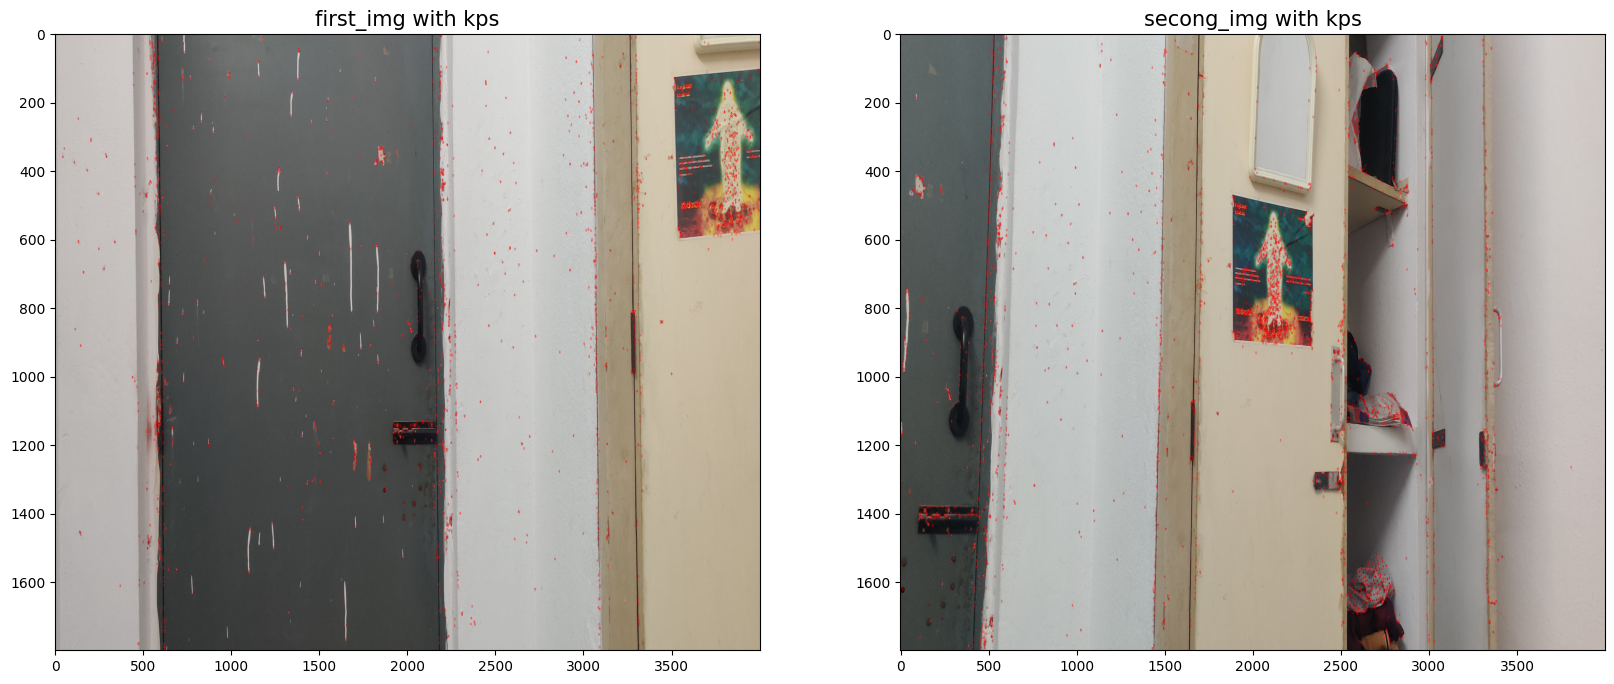

In [150]:
# overlay kps on images
img1_with_kps = cv2.drawKeypoints(img1, kps1, None, color = (255, 0, 0))
img2_with_kps = cv2.drawKeypoints(img2, kps2, None, color = (255, 0, 0))

img_set = []
img_set.append(img1_with_kps)
img_set.append(img2_with_kps)

img_titles = []
img_titles.append('first_img with kps')
img_titles.append('secong_img with kps')

plot_images(img_set, 1, 2, img_titles)



In [193]:
# get correspondences
if(feature_extractor_method == 'sift' or feature_extractor_method == 'surf'):
    fm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)   #feature matching in cv2
if(feature_extractor_method == 'brief' or feature_extractor_method == 'orb'):
    fm = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)   #feature matching in cv2
    
matches = fm.match(descriptors2,descriptors1)   #train img and then query img
matches = sorted(matches, key = lambda x:x.distance)
print('len of matches: {}'.format(len(matches)))

img_correspondences = cv2.drawMatches(img2, kps2, img1, kps1, matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# img_correspondences = cv2.line(img_correspondences, (0, 0), (0, 0), (0, 0, 255), thickness=5)




len of matches: 935


In [194]:
# compute homography
kps1_np = np.array([kp.pt for kp in kps1])
kps2_np = np.array([kp.pt for kp in kps2])
print(kps2_np.shape)

#get correponding (x, y) coordinates for both the images from the matches (train image to be warped onto query image)
pts1 = np.array([kps1_np[c.trainIdx] for c in matches])
pts2 = np.array([kps2_np[c.queryIdx] for c in matches])

H, _ = cv2.findHomography(pts2, pts1, cv2.RANSAC, 3)
print(H)

(3787, 2)
[[ 4.43042025e-01  1.16960561e-01  1.73756885e+03]
 [-1.58706388e-01  8.53845745e-01 -1.14659557e+01]
 [-1.38734872e-04  2.17254145e-05  1.00000000e+00]]


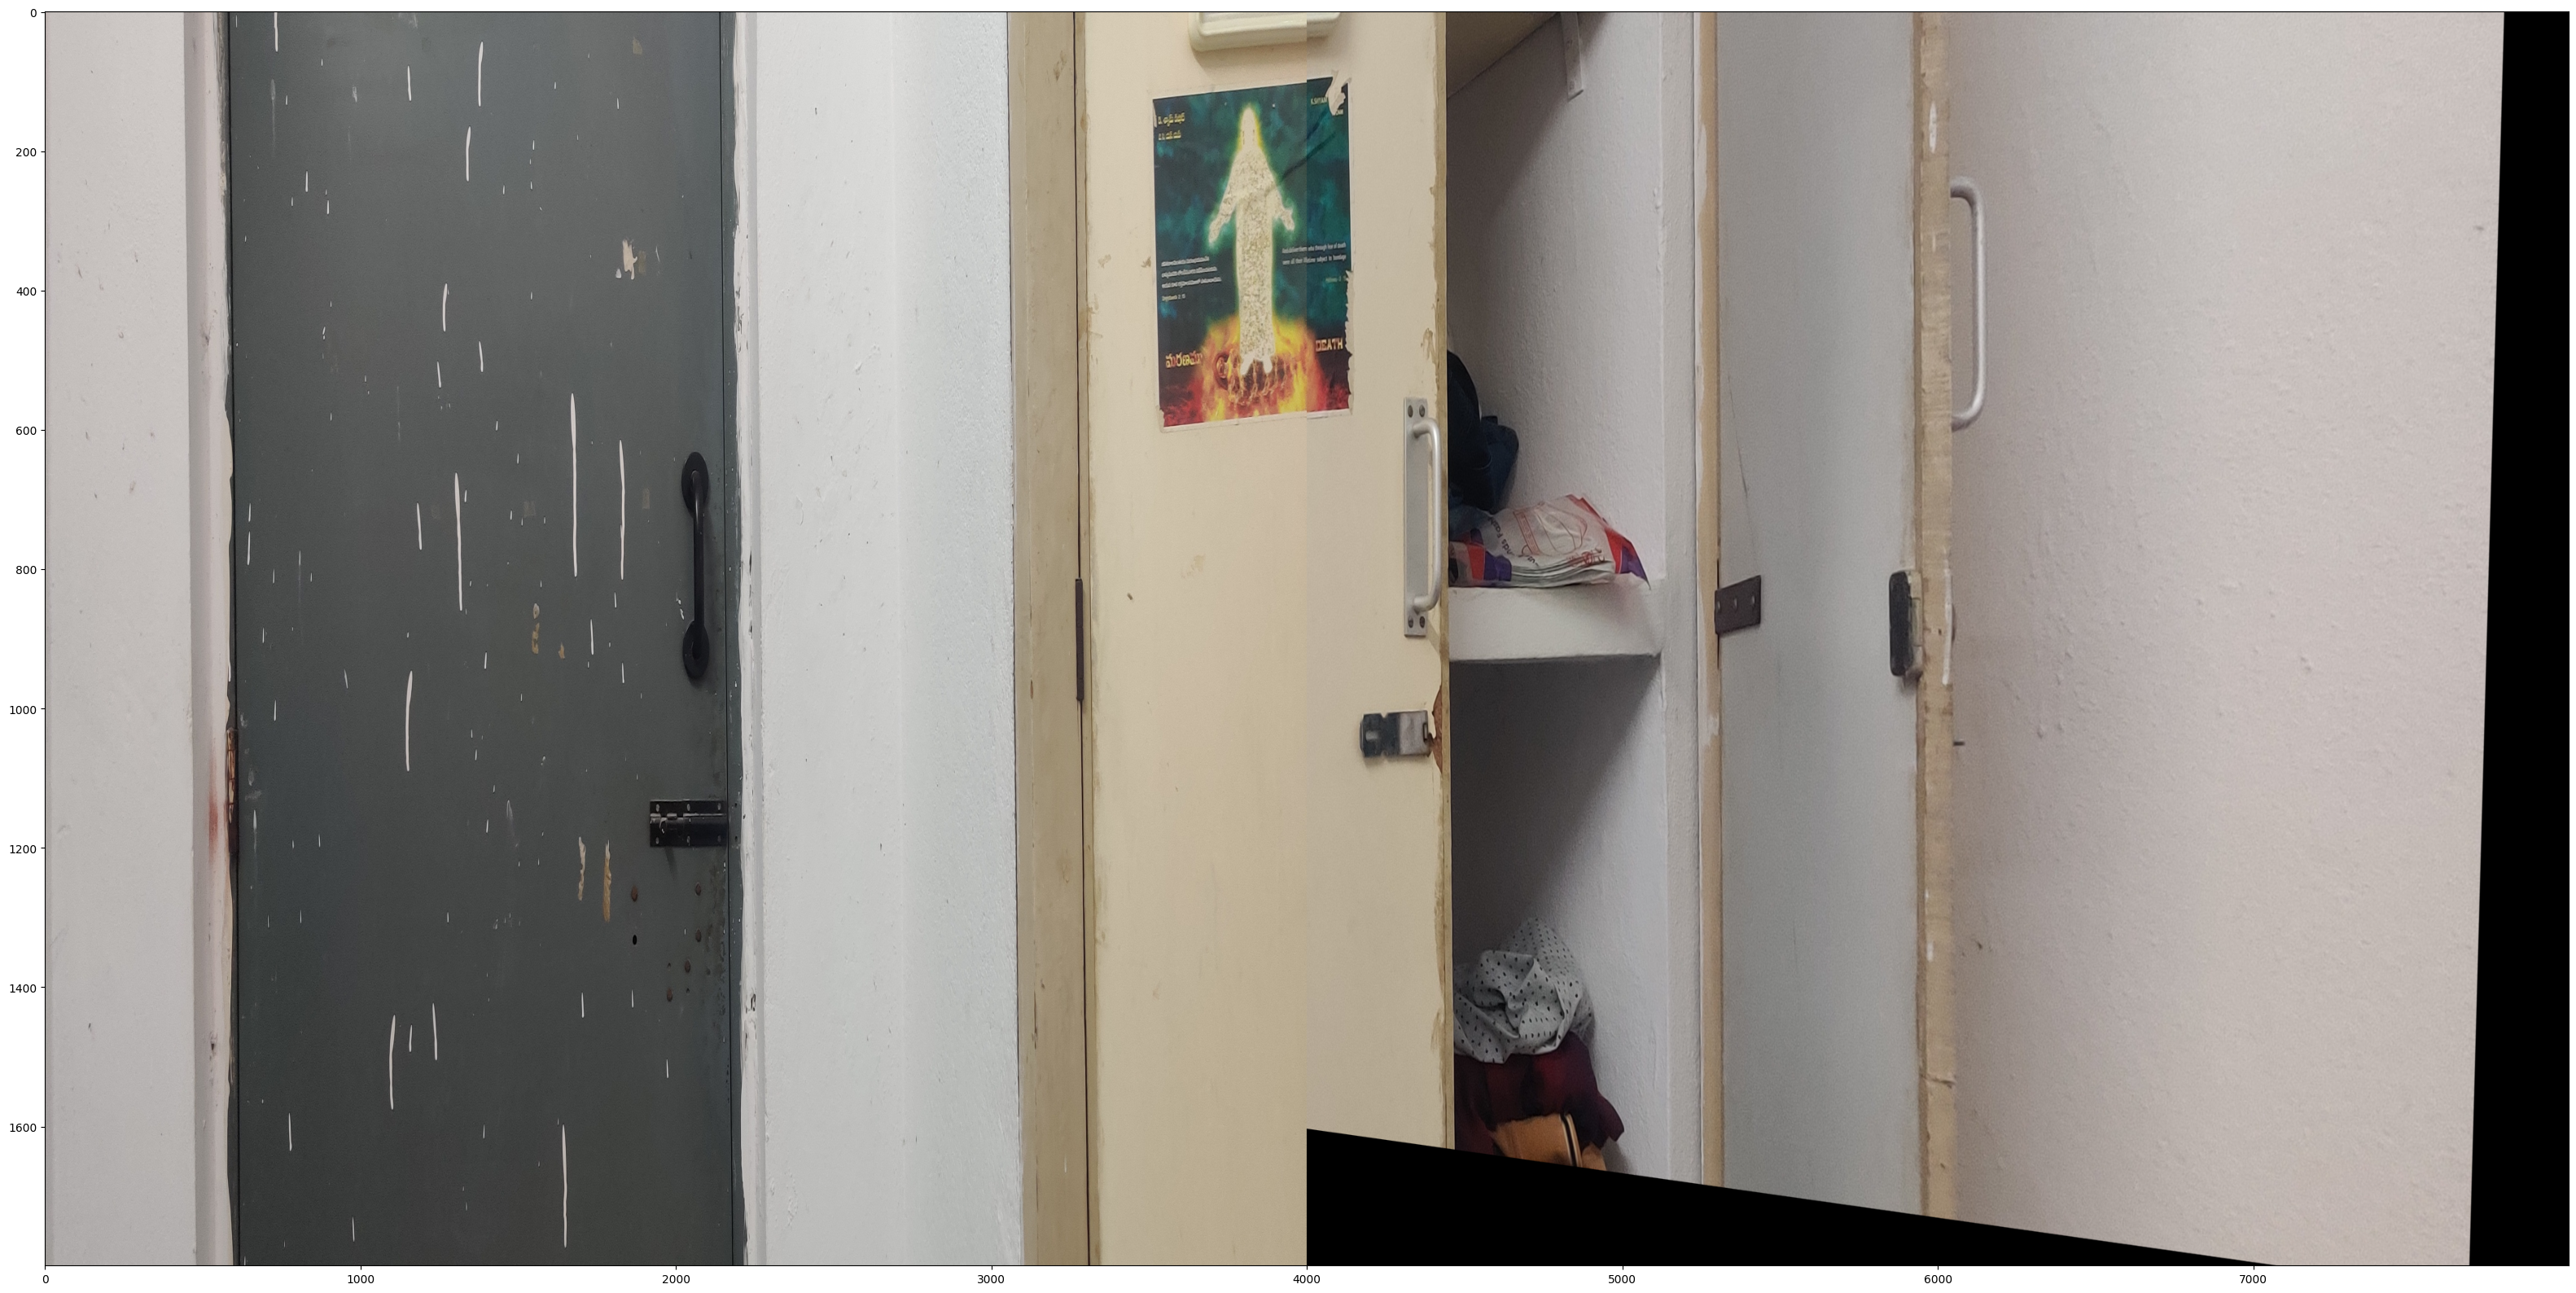

In [196]:
h = max(img1.shape[0], img2.shape[0])
w = img1.shape[1] + img2.shape[1]
stitched_img = cv2.warpPerspective(img2, H, (w, h))
stitched_img[0:img1.shape[0], 0:img1.shape[1]] = img1

plt.figure(figsize=(40,20))
plt.imshow(stitched_img, aspect='auto')